In [1]:
import an_specific_utilities as ut
from my_py_ai_utils import *
import my_py_analysis_utils as pyanaut

import math as m
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
with open("DY_PU200.pkl", "rb") as fsigpklfile:
    fsig = pickle.load(fsigpklfile)
with open("MinBias.pkl", "rb") as fbkgpklfile:
    fbkg = pickle.load(fbkgpklfile)

In [11]:
ebspt = fsig["TkEleL2_EB_MCH_pt"]
ebsiso = fsig["TkEleL2_EB_MCH_tkIso"]
ebsabsiso = fsig["TkEleL2_EB_MCH_absTkIso"]
ebspiso = fsig["TkEleL2_EB_MCH_puppiIso"]
ebspreiso = fsig["TkEleL2_EB_MCH_reisotot_dRmin0_01_puppiIso"]
ebsabspreiso = fsig["TkEleL2_EB_MCH_reisotot_dRmin0_01_absPuppiIso"]

ebbpt = fbkg["TkEleL2_Pt5_EB_pt"]
ebbiso = fbkg["TkEleL2_Pt5_EB_tkIso"]
ebbabsiso = fbkg["TkEleL2_Pt5_EB_absTkIso"]
ebbpiso = fbkg["TkEleL2_Pt5_EB_puppiIso"]
ebbpreiso = fbkg["TkEleL2_Pt5_EB_reisotot_dRmin0_01_puppiIso"]
ebbabspreiso = fbkg["TkEleL2_Pt5_EB_reisotot_dRmin0_01_absPuppiIso"]
print(ebspt.shape, ebsiso.shape, ebsabsiso.shape,
      ebspiso.shape, ebspreiso.shape, ebsabspreiso.shape)
print(ebbpt.shape, ebbiso.shape, ebbabsiso.shape,
      ebbpiso.shape, ebbpreiso.shape, ebbabspreiso.shape)

eespt = fsig["TkEleL2_EE_MCH_pt"]
eesiso = fsig["TkEleL2_EE_MCH_tkIso"]
eesabsiso = fsig["TkEleL2_EE_MCH_absTkIso"]
eespiso = fsig["TkEleL2_EE_MCH_puppiIso"]
eespreiso = fsig["TkEleL2_EE_MCH_reisotot_dRmin0_01_puppiIso"]
eesabspreiso = fsig["TkEleL2_EE_MCH_reisotot_dRmin0_01_absPuppiIso"]

eebpt = fbkg["TkEleL2_Pt5_EE_pt"]
eebiso = fbkg["TkEleL2_Pt5_EE_tkIso"]
eebabsiso = fbkg["TkEleL2_Pt5_EE_absTkIso"]
eebpiso = fbkg["TkEleL2_Pt5_EE_puppiIso"]
eebpreiso = fbkg["TkEleL2_Pt5_EE_reisotot_dRmin0_01_puppiIso"]
eebabspreiso = fbkg["TkEleL2_Pt5_EE_reisotot_dRmin0_01_absPuppiIso"]
print(eespt.shape, eesiso.shape, eesabsiso.shape,
      eespiso.shape, eespreiso.shape, eesabspreiso.shape)
print(eebpt.shape, eebiso.shape, eebabsiso.shape,
      eebpiso.shape, eebpreiso.shape, eebabspreiso.shape)

print()

ebsi = np.concatenate(ebsiso)
ebspi = np.concatenate(ebspiso)
ebsprei = np.concatenate(ebspreiso)
ebbi = np.concatenate(ebbiso)
ebbpi = np.concatenate(ebbpiso)
ebbprei = np.concatenate(ebbpreiso)
print(ebsi.shape, ebspi.shape, ebsprei.shape, ebbi.shape, ebbpi.shape, ebbprei.shape)

eesi = np.concatenate(eesiso)
eespi = np.concatenate(eespiso)
eesprei = np.concatenate(eespreiso)
eebi = np.concatenate(eebiso)
eebpi = np.concatenate(eebpiso)
eebprei = np.concatenate(eebpreiso)
print(eesi.shape, eespi.shape, eesprei.shape, eebi.shape, eebpi.shape, eebprei.shape)

(164146,) (164146,) (164146,) (164146,) (164146,) (164146,)
(172468,) (172468,) (172468,) (172468,) (172468,) (172468,)
(98530,) (98530,) (98530,) (98530,) (98530,) (98530,)
(205191,) (205191,) (205191,) (205191,) (205191,) (205191,)

(216410,) (216410,) (216410,) (209477,) (209477,) (209477,)
(108722,) (108722,) (108722,) (236572,) (236572,) (236572,)


# ROC curve #

Add more details about the code or methodology if any

In [4]:
make_roc([[ebsi, ebbi, 'tkIso'],
          [ebspi, ebbpi, 'puppiIso'],
          [ebsprei, ebbprei, 'RePuppiIso']],
         filename="TkEleL2_EB_tkIso_ROC.png", scale="piecewise_linear", s=5)

make_roc([[eesi, eebi, 'tkIso'],
          [eespi, eebpi, 'puppiIso'],
          [eesprei, eebprei, 'RePuppiIso']],
         filename="TkEleL2_EE_tkIso_ROC.png", scale="piecewise_linear", s=5)

make_roc([[ebsi, ebbi, 'tkIso'],
          [ebspi, ebbpi, 'puppiIso'],
          [ebsprei, ebbprei, 'RePuppiIso']],
         filename="TkEleL2_EB_tkIso_ROC_linear.png",
         xlim=(0.5, 1.05), ylim=(0.45, 1.05), s=5)

make_roc([[eesi, eebi, 'tkIso'],
          [eespi, eebpi, 'puppiIso'],
          [eesprei, eebprei, 'RePuppiIso']],
         filename="TkEleL2_EE_tkIso_ROC_linear.png",
         xlim=(0.45, 1.05), ylim=(0.45, 1.05), s=5)

AUC: -0.0947
AUC: 0.0523
AUC: -0.0429
Saving ROC curve to TkEleL2_EB_tkIso_ROC.png...
0.97707814
0.9036346
0.6013259
ROC curve saved to TkEleL2_EB_tkIso_ROC.png

##############################
Execution time of function make_roc: 2.524457 seconds
AUC: 0.0927
AUC: 0.2450
AUC: 0.0333
Saving ROC curve to TkEleL2_EE_tkIso_ROC.png...
0.9807018
0.8295698
0.4988045
ROC curve saved to TkEleL2_EE_tkIso_ROC.png

##############################
Execution time of function make_roc: 0.457621 seconds
AUC: -0.0892
AUC: -0.0044
AUC: -0.1375
Saving ROC curve to TkEleL2_EB_tkIso_ROC_linear.png...
0.7029838
0.9036329
0.60055935
ROC curve saved to TkEleL2_EB_tkIso_ROC_linear.png

##############################
Execution time of function make_roc: 2.372304 seconds
AUC: 0.2021
AUC: -0.0396
AUC: 0.1765
Saving ROC curve to TkEleL2_EE_tkIso_ROC_linear.png...
0.7796727
0.85383487
0.8636101
ROC curve saved to TkEleL2_EE_tkIso_ROC_linear.png

##############################
Execution time of function make_roc: 0.40

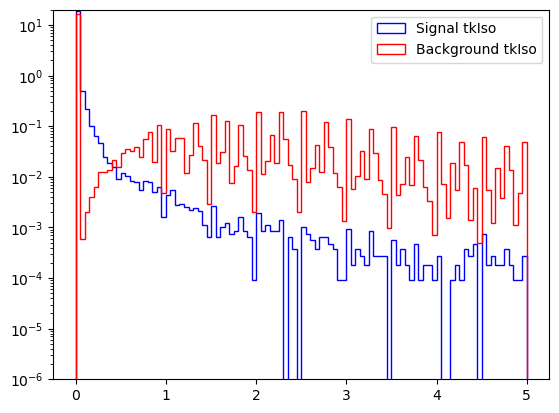

In [8]:
plt.hist(np.concatenate(ebsiso), bins=100, range=(0, 5), density=True, histtype='step', label='Signal tkIso', color='blue')
plt.hist(np.concatenate(ebbiso), bins=100, range=(0, 5), density=True, histtype='step', label='Background tkIso', color='red')
plt.yscale('log')
plt.ylim(1e-6, 20)
plt.legend()
plt.show()

In [18]:
roc_res_eb = make_roc_per_event([[ebsiso, ebbiso, 'tkIso'],
                                 [ebspiso, ebbpiso, 'puppiIso'],
                                 [ebspreiso, ebbpreiso, 'RePuppiIso']],
                                thrvs = np.arange(0, 5, 0.0125))

tkIso
164146 164146
919809 919809
Execution time: 12.246418952941895 seconds
Execution time: 51.285027265548706 seconds
puppiIso
164146 164146
919809 919809
Execution time: 12.55977201461792 seconds
Execution time: 50.81929302215576 seconds
RePuppiIso
164146 164146
919809 919809
Execution time: 12.660863161087036 seconds
Execution time: 56.064059019088745 seconds

##############################
Execution time of function make_roc_per_event: 196.103399 seconds


In [19]:
make_roc_png(roc_res_eb, filename="TkEleL2_EB_ROCperevent_linear.png", xlim=(0.98, 1.001), ylim=(0.9, 1.01), s=5)
make_roc_png(roc_res_eb, filename="TkEleL2_EB_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to TkEleL2_EB_ROCperevent_linear.png...
0.9956338761634209
0.9984996885222911
0.9807981874497858
ROC curve saved to TkEleL2_EB_ROCperevent_linear.png
Saving ROC curve to TkEleL2_EB_ROCperevent.png...
0.9956338761634209
0.9984996885222911
0.9807981874497858
ROC curve saved to TkEleL2_EB_ROCperevent.png


In [20]:
roc_res_ee = make_roc_per_event([[eesiso, eebiso, 'tkIso'],
                                 [eespiso, eebpiso, 'puppiIso'],
                                 [eespreiso, eebpreiso, 'RePuppiIso']],
                                thrvs = np.arange(0, 5, 0.0125))

tkIso
98530 98530
280671 280671
Execution time: 10.18717908859253 seconds
Execution time: 19.553097009658813 seconds
puppiIso
98530 98530
280671 280671
Execution time: 10.126250982284546 seconds
Execution time: 19.5607647895813 seconds
RePuppiIso
98530 98530
280671 280671
Execution time: 10.197595834732056 seconds
Execution time: 20.919633150100708 seconds

##############################
Execution time of function make_roc_per_event: 90.705495 seconds


In [21]:
make_roc_png(roc_res_ee, filename="TkEleL2_EE_tkIso_ROCperevent_linear.png", xlim=(0.5, 1.001), ylim=(0.5, 1.01), s=5)
make_roc_png(roc_res_ee, filename="TkEleL2_EE_tkIso_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to TkEleL2_EE_tkIso_ROCperevent_linear.png...
0.8607978736670336
0.8997117621699428
0.5453894417307096
ROC curve saved to TkEleL2_EE_tkIso_ROCperevent_linear.png
Saving ROC curve to TkEleL2_EE_tkIso_ROCperevent.png...
0.8607978736670336
0.8997117621699428
0.5453894417307096
ROC curve saved to TkEleL2_EE_tkIso_ROCperevent.png


In [5]:
# @ut.time_eval
def generate_pt_mask(arr, ptlim):
    
    mask = [[(v > ptlim) for v in arre] for arre in arr]

    return mask


# @ut.time_eval
def apply_pt_mask(arr, mask):

    newarr = np.array([[v for v, m in zip(arre, maske) if m] for arre, maske in zip(arr, mask)], dtype=object)

    return newarr

In [6]:
ebspt20mask = generate_pt_mask(ebspt, 20)
ebbpt20mask = generate_pt_mask(ebbpt, 20)

eespt20mask = generate_pt_mask(eespt, 20)
eebpt20mask = generate_pt_mask(eebpt, 20)

pt20ebsiso = apply_pt_mask(ebsiso, ebspt20mask)
pt20ebspiso = apply_pt_mask(ebspiso, ebspt20mask)
pt20ebspreiso = apply_pt_mask(ebspreiso, ebspt20mask)

pt20ebbiso = apply_pt_mask(ebbiso, ebbpt20mask)
pt20ebbpiso = apply_pt_mask(ebbpiso, ebbpt20mask)
pt20ebbpreiso = apply_pt_mask(ebbpreiso, ebbpt20mask)

pt20eesiso = apply_pt_mask(eesiso, eespt20mask)
pt20eespiso = apply_pt_mask(eespiso, eespt20mask)
pt20eespreiso = apply_pt_mask(eespreiso, eespt20mask)

pt20eebiso = apply_pt_mask(eebiso, eebpt20mask)
pt20eebpiso = apply_pt_mask(eebpiso, eebpt20mask)
pt20eebpreiso = apply_pt_mask(eebpreiso, eebpt20mask)

In [7]:
roc_res_eb_pt20 = make_roc_per_event([[pt20ebsiso, pt20ebbiso, 'tkIso'],
                                      [pt20ebspiso, pt20ebbpiso, 'puppiIso'],
                                      [pt20ebspreiso, pt20ebbpreiso, 'RePuppiIso']],
                                     thrvs = np.arange(0, 5, 0.0125))

tkIso
164146 130635
919809 5828
Execution time: 6.915459871292114 seconds
Execution time: 14.20870304107666 seconds
puppiIso
164146 130635
919809 5828
Execution time: 6.903432130813599 seconds
Execution time: 13.894279956817627 seconds
RePuppiIso
164146 130635
919809 5828
Execution time: 6.870428800582886 seconds
Execution time: 14.235974073410034 seconds

##############################
Execution time of function make_roc_per_event: 63.191612 seconds


In [47]:
make_roc_png(roc_res_eb_pt20, filename="Pt20_TkEleL2_EB_ROCperevent_linear.png", xlim=(0.1, 1.05), ylim=(0.1, 1.05), s=5)
make_roc_png(roc_res_eb_pt20, filename="Pt20_TkEleL2_EB_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to Pt20_TkEleL2_EB_ROCperevent_linear.png...
0.23970487302676732
0.3517501715854496
0.127831159917639
ROC curve saved to Pt20_TkEleL2_EB_ROCperevent_linear.png
Saving ROC curve to Pt20_TkEleL2_EB_ROCperevent.png...
0.23970487302676732
0.3517501715854496
0.127831159917639
ROC curve saved to Pt20_TkEleL2_EB_ROCperevent.png


In [9]:
roc_res_ee_pt20 = make_roc_per_event([[pt20eesiso, pt20eebiso, 'tkIso'],
                                      [pt20eespiso, pt20eebpiso, 'puppiIso'],
                                      [pt20eespreiso, pt20eebpreiso, 'RePuppiIso']],
                                     thrvs = np.arange(0, 5, 0.0125))

tkIso
98530 87040
280671 1685
Execution time: 5.095911979675293 seconds
Execution time: 5.979308128356934 seconds
puppiIso
98530 87040
280671 1685
Execution time: 4.999032974243164 seconds
Execution time: 5.836171865463257 seconds
RePuppiIso
98530 87040
280671 1685
Execution time: 5.161166191101074 seconds
Execution time: 5.863265037536621 seconds

##############################
Execution time of function make_roc_per_event: 32.995263 seconds


In [10]:
make_roc_png(roc_res_ee_pt20, filename="Pt20_TkEleL2_EE_ROCperevent_linear.png", xlim=(0.1, 1.05), ylim=(0.1, 1.05), s=5)
make_roc_png(roc_res_ee_pt20, filename="Pt20_TkEleL2_EE_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to Pt20_TkEleL2_EE_ROCperevent_linear.png...
0.47062314540059347
0.712166172106825
0.27240356083086054
ROC curve saved to Pt20_TkEleL2_EE_ROCperevent_linear.png
Saving ROC curve to Pt20_TkEleL2_EE_ROCperevent.png...
0.47062314540059347
0.712166172106825
0.27240356083086054
ROC curve saved to Pt20_TkEleL2_EE_ROCperevent.png


In [11]:
ebspt10mask = generate_pt_mask(ebspt, 10)
ebbpt10mask = generate_pt_mask(ebbpt, 10)

eespt10mask = generate_pt_mask(eespt, 10)
eebpt10mask = generate_pt_mask(eebpt, 10)

pt10ebspt = apply_pt_mask(ebspt, ebspt10mask)
pt10ebsiso = apply_pt_mask(ebsiso, ebspt10mask)
pt10ebspiso = apply_pt_mask(ebspiso, ebspt10mask)
pt10ebspreiso = apply_pt_mask(ebspreiso, ebspt10mask)

pt10ebbpt = apply_pt_mask(ebbpt, ebbpt10mask)
pt10ebbiso = apply_pt_mask(ebbiso, ebbpt10mask)
pt10ebbpiso = apply_pt_mask(ebbpiso, ebbpt10mask)
pt10ebbpreiso = apply_pt_mask(ebbpreiso, ebbpt10mask)

pt10eespt = apply_pt_mask(eespt, eespt10mask)
pt10eesiso = apply_pt_mask(eesiso, eespt10mask)
pt10eespiso = apply_pt_mask(eespiso, eespt10mask)
pt10eespreiso = apply_pt_mask(eespreiso, eespt10mask)

pt10eebpt = apply_pt_mask(eebpt, eebpt10mask)
pt10eebiso = apply_pt_mask(eebiso, eebpt10mask)
pt10eebpiso = apply_pt_mask(eebpiso, eebpt10mask)
pt10eebpreiso = apply_pt_mask(eebpreiso, eebpt10mask)

In [12]:
# @ut.time_eval
def generate_mult_mask(arr, multlim):
    
    mask = [len(arre) >= multlim for arre in arr]

    return mask


# @ut.time_eval
def apply_mult_mask(arr, mask):

    newarr = np.array([arre for arre, maske in zip(arr, mask) if maske], dtype=object)

    return newarr

In [13]:
ebsn2pt10mask = generate_mult_mask(pt10ebspt, 2)
ebbn2pt10mask = generate_mult_mask(pt10ebbpt, 2)

n2pt10ebspt = apply_mult_mask(pt10ebspt, ebsn2pt10mask)
n2pt10ebsiso = apply_mult_mask(pt10ebsiso, ebsn2pt10mask)
n2pt10ebspiso = apply_mult_mask(pt10ebspiso, ebsn2pt10mask)
n2pt10ebspreiso = apply_mult_mask(pt10ebspreiso, ebsn2pt10mask)

n2pt10ebbpt = apply_mult_mask(pt10ebbpt, ebsn2pt10mask)
n2pt10ebbiso = apply_mult_mask(pt10ebbiso, ebsn2pt10mask)
n2pt10ebbpiso = apply_mult_mask(pt10ebbpiso, ebsn2pt10mask)
n2pt10ebbpreiso = apply_mult_mask(pt10ebbpreiso, ebsn2pt10mask)

eesn2pt10mask = generate_mult_mask(pt10eespt, 2)
eebn2pt10mask = generate_mult_mask(pt10eebpt, 2)

n2pt10eespt = apply_mult_mask(pt10eespt, eesn2pt10mask)
n2pt10eesiso = apply_mult_mask(pt10eesiso, eesn2pt10mask)
n2pt10eespiso = apply_mult_mask(pt10eespiso, eesn2pt10mask)
n2pt10eespreiso = apply_mult_mask(pt10eespreiso, eesn2pt10mask)

n2pt10eebpt = apply_mult_mask(pt10eebpt, eesn2pt10mask)
n2pt10eebiso = apply_mult_mask(pt10eebiso, eesn2pt10mask)
n2pt10eebpiso = apply_mult_mask(pt10eebpiso, eesn2pt10mask)
n2pt10eebpreiso = apply_mult_mask(pt10eebpreiso, eesn2pt10mask)

In [14]:
roc_res_eb_n2pt10 = make_roc_per_event([[n2pt10ebsiso, n2pt10ebbiso, 'tkIso'],
                                        [n2pt10ebspiso, n2pt10ebbpiso, 'puppiIso'],
                                        [n2pt10ebspreiso, n2pt10ebbpreiso, 'RePuppiIso']],
                                       thrvs = np.arange(0, 5, 0.0125))

tkIso
49821 49821
49821 2030
Execution time: 4.245491981506348 seconds
Execution time: 1.132094383239746 seconds
puppiIso
49821 49821
49821 2030
Execution time: 3.963942766189575 seconds
Execution time: 1.1096267700195312 seconds
RePuppiIso
49821 49821
49821 2030
Execution time: 4.324130058288574 seconds
Execution time: 1.1647350788116455 seconds

##############################
Execution time of function make_roc_per_event: 15.959746 seconds


In [15]:
make_roc_png(roc_res_eb_n2pt10, filename="N2Pt10_TkEleL2_EB_ROCperevent_linear.png", xlim=(0.1, 1.05), ylim=(0.1, 1.05), s=5)
make_roc_png(roc_res_eb_n2pt10, filename="N2Pt10_TkEleL2_EB_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to N2Pt10_TkEleL2_EB_ROCperevent_linear.png...
0.41330049261083746
0.5798029556650246
0.3019704433497537
ROC curve saved to N2Pt10_TkEleL2_EB_ROCperevent_linear.png
Saving ROC curve to N2Pt10_TkEleL2_EB_ROCperevent.png...
0.41330049261083746
0.5798029556650246
0.3019704433497537
ROC curve saved to N2Pt10_TkEleL2_EB_ROCperevent.png


In [16]:
roc_res_ee_n2pt10 = make_roc_per_event([[n2pt10eesiso, n2pt10eebiso, 'tkIso'],
                                        [n2pt10eespiso, n2pt10eebpiso, 'puppiIso'],
                                        [n2pt10eespreiso, n2pt10eebpreiso, 'RePuppiIso']],
                                       thrvs = np.arange(0, 5, 0.0125))

tkIso
9894 9894
9894 1142
Execution time: 2.784001111984253 seconds
Execution time: 0.5340428352355957 seconds
puppiIso
9894 9894
9894 1142
Execution time: 2.772120237350464 seconds
Execution time: 0.5439019203186035 seconds
RePuppiIso
9894 9894
9894 1142
Execution time: 2.562574863433838 seconds
Execution time: 0.5288572311401367 seconds

##############################
Execution time of function make_roc_per_event: 9.737840 seconds


In [17]:
make_roc_png(roc_res_ee_n2pt10, filename="N2Pt10_TkEleL2_EE_ROCperevent_linear.png", xlim=(0.1, 1.05), ylim=(0.1, 1.05), s=5)
make_roc_png(roc_res_ee_n2pt10, filename="N2Pt10_TkEleL2_EE_ROCperevent.png", scale="piecewise_linear", s=5)

Saving ROC curve to N2Pt10_TkEleL2_EE_ROCperevent_linear.png...
0.6725043782837128
0.7994746059544658
0.4352014010507881
ROC curve saved to N2Pt10_TkEleL2_EE_ROCperevent_linear.png
Saving ROC curve to N2Pt10_TkEleL2_EE_ROCperevent.png...
0.6725043782837128
0.7994746059544658
0.4352014010507881
ROC curve saved to N2Pt10_TkEleL2_EE_ROCperevent.png


In [ ]:
def make_roc_png(roc_res, *,
                 filename: str = "roc_curve.png",
                 scale: str = "default",
                 xlim: tuple[float] = (0.1, 1.1), ylim: tuple[float] = (0.1, 1.1), **kwargs):


    markers = ['o', '*', 'v', '^']
    cmaps = ['viridis', 'plasma', 'inferno', 'coolwarm']

    # Plot ROC curves
    print(f"Saving ROC curve to {filename}...")
    plt.figure(figsize=(8, 6))
    for i, (fpr, tpr, thr, sample) in enumerate(roc_res):
        
        scatter = plt.scatter(fpr, tpr,
                                c=thr, cmap = cmaps[i], norm='log', # Colour maps can slow larger arrays
                                marker=markers[i],
                                label=sample, **kwargs)
        plt.colorbar(scatter)

    if scale == "piecewise_linear":
        # Adjust plotting to show 0.1 to 0.9 and 0.9 to 0.99 and 0.99 to 1.0 and 1.0 to 1.1 regions clearly
        # Optional: vertical guides at the two boundaries for clarity
        plt.xscale('piecewise_0p1_0p9_0p999')
        plt.yscale('piecewise_0p1_0p9_0p999')
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
        for v in [0.9, 0.99, 1.0]:
            plt.axvline(v, color='0.7', lw=1, ls='--')
    else:
        plt.xlim(left=xlim[0], right=xlim[1])
        plt.ylim(bottom=ylim[0], top=ylim[1])

    plt.grid(True, which='both', ls='--', alpha=0.4)

    plt.xlabel('False Positive Rate (log scale)')
    plt.ylabel('True Positive Rate (log scale)')
    plt.title('ROC Curve')

    plt.legend(loc='lower right')
    plt.savefig(filename, dpi=300)
    print(f"ROC curve saved to {filename}")
    plt.close()

In [33]:
make_roc_png(roc_res_eb_pt20, filename="Pt20_TkEleL2_EB_ROCperevent_linear.png", xlim=(0.1, 1.05), ylim=(0.1, 1.05), s=5)


Saving ROC curve to Pt20_TkEleL2_EB_ROCperevent_linear.png...
ROC curve saved to Pt20_TkEleL2_EB_ROCperevent_linear.png


# Signal Efficiency Contours: Isolation value vs. pT #

Add more details about the code or methodology if any

In [12]:
def ptbinned_rate_analysis_by_signal_percentile_contours(spt, siso, sreiso,
                                                         bpt, biso, breiso, *,
                                                         refl = "tk. iso.", newl = "puppi iso.",
                                                         iylog = True, iytop = 20, iybot = 0.01
                                                         ):
    
    percentiles = [97.5, 99.5]
    # percentiles = [99]
    colours = ['#377eb8', '#ff7f00', '#4daf4a',
               '#f781bf', '#a65628', '#984ea3',
               '#999999', '#e41a1c', '#dede00']
    
    iso_ptbinned = pyanaut.get_isovals_for_sigpercentiles(spt, siso, percentiles)
    reiso_ptbinned = pyanaut.get_isovals_for_sigpercentiles(spt, sreiso, percentiles)
    iso_fpr = pyanaut.get_fpr_by_sigpercentiles(bpt, biso, iso_ptbinned)
    reiso_fpr = pyanaut.get_fpr_by_sigpercentiles(bpt, breiso, reiso_ptbinned)

    ptmin, ptmax = (8, 60)
    piso_ytop, piso_ybottom = (iytop, iybot)
    pfpr_ytop, pfpr_ybottom = (110, 0)

    figsize = (12, 5)
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    ax1, ax2 = ax

    for i in range(len(percentiles)):
        ax1.plot(list(iso_ptbinned[i].keys())[ptmin:ptmax], list(iso_ptbinned[i].values())[ptmin:ptmax],
                 c=colours[i], linestyle='--')
        ax1.plot(list(reiso_ptbinned[i].keys())[ptmin:ptmax], list(reiso_ptbinned[i].values())[ptmin:ptmax],
                 label=percentiles[i], c=colours[i])
    
        ax2.plot(list(iso_fpr[i].keys())[ptmin:ptmax], list(iso_fpr[i].values())[ptmin:ptmax],
                 c=colours[i], linestyle='--')
        ax2.plot(list(reiso_fpr[i].keys())[ptmin:ptmax], list(reiso_fpr[i].values())[ptmin:ptmax],
                 label=percentiles[i], c=colours[i])

    ax1.legend()
    ax2.legend()

    ax1.set_ylim(top=piso_ytop, bottom=piso_ybottom)
    if iylog:
        ax1.set_yscale('log')
    ax1.set_title('isolation values')
    ax1.set_xlabel('pt [GeV]')
    ax1.set_ylabel('rel. iso. value')

    ax2.set_ylim(top=pfpr_ytop, bottom=pfpr_ybottom)
    ax2.set_title('electrons')
    ax2.set_xlabel('pt [GeV]')
    ax2.set_ylabel('false positive rate / GeV')

    isodef_handles = [
        Line2D([0], [0], linestyle='--', label=refl),
        Line2D([0], [0], label=newl)
    ]
    fig.legend(handles=isodef_handles, loc="upper center")

    return fig, ax

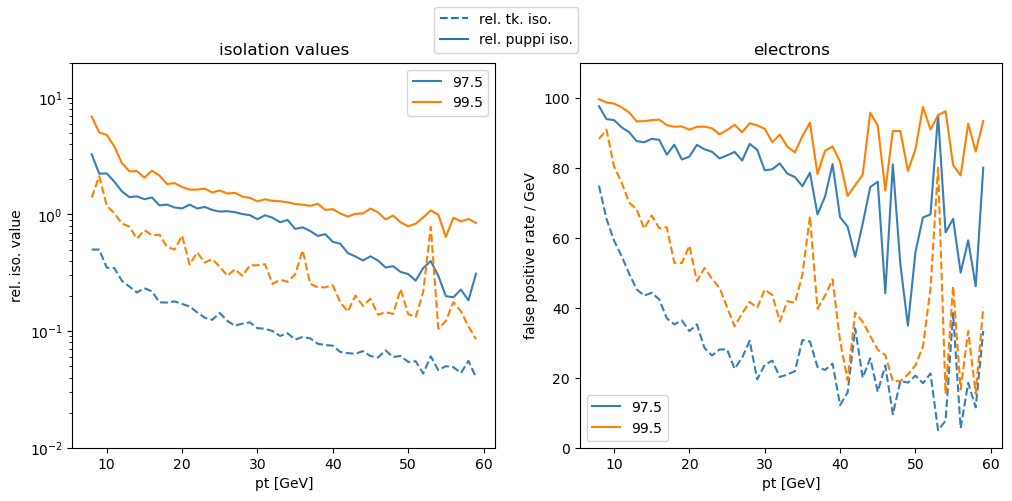

In [13]:
fig, ax = ptbinned_rate_analysis_by_signal_percentile_contours(ebspt, ebsiso, ebspiso,
                                                               ebbpt, ebbiso, ebbpiso,
                                                               refl = "rel. tk. iso.", newl = "rel. puppi iso.")

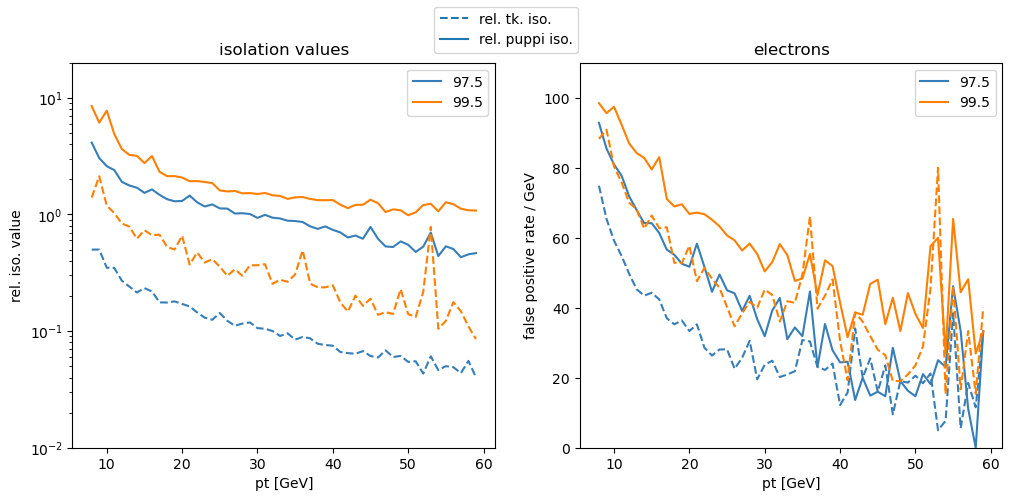

In [14]:
fig, ax = ptbinned_rate_analysis_by_signal_percentile_contours(ebspt, ebsiso, ebspreiso,
                                                               ebbpt, ebbiso, ebbpreiso,
                                                               refl = "rel. tk. iso.", newl = "rel. puppi iso.")

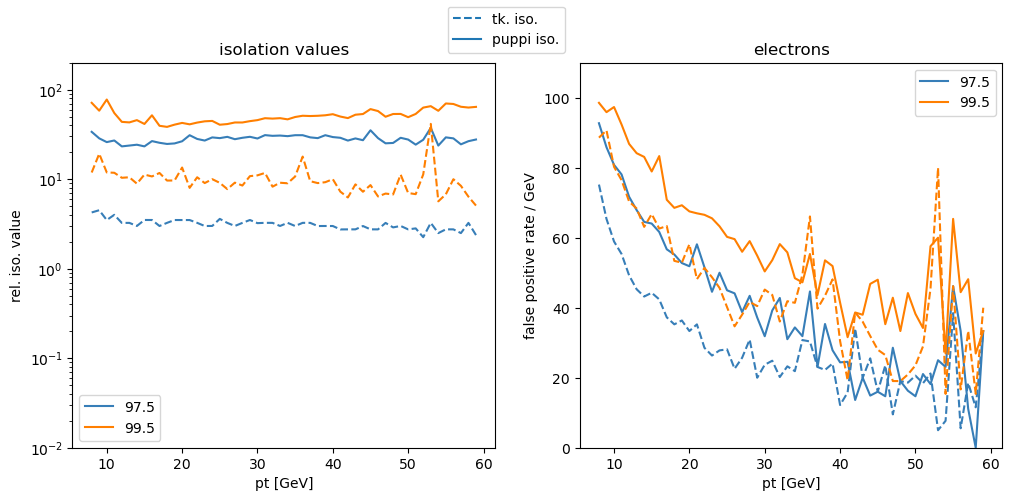

In [16]:
fig, ax = ptbinned_rate_analysis_by_signal_percentile_contours(ebspt, ebsabsiso, ebsabspreiso,
                                                               ebbpt, ebbabsiso, ebbabspreiso,
                                                               refl = "tk. iso.", newl = "puppi iso.",
                                                               iytop = 200)